In [1]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
import os

In [2]:
Dir = r'/kaggle/input/sheep-breed-classification/SheepFaceImages'
Categories = ['Marino','Poll Dorset','Suffolk','White Suffolk']

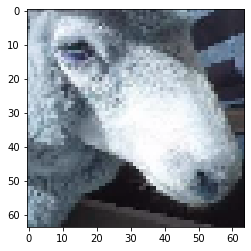

In [3]:
img_size = 64
data = []

for category in Categories:
    folder = os.path.join(Dir,category)
    label = Categories.index(category)
    #print(folder)
    #print(label)
    for img in os.listdir(folder):
        img_path = os.path.join(folder,img)
        #print(img_path)
        #break
        img_arr = cv2.imread(img_path)
        #plt.imshow(img_arr)
        img_arr = cv2.resize(img_arr, (img_size,img_size))
        #print(img_arr)
        plt.imshow(img_arr)
        data.append([img_arr,label])

In [4]:
len(data)

1680

In [5]:
random.shuffle(data)

In [6]:
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)

In [7]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(1680, 64, 64, 3)
(1680,)


In [8]:
X = X/255.0


In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential

In [10]:
model = Sequential()

model.add(Conv2D(64, (2,2), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (2,2), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256, (2,2), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))


In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [12]:
X.shape

(1680, 64, 64, 3)

In [13]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
model.fit(xTrain,yTrain,epochs = 20, validation_split = 0.2)

Epoch 1/20
34/34 [==============================] - 7s 200ms/step - loss: 1.2735 - accuracy: 0.3935 - val_loss: 1.0938 - val_accuracy: 0.4684
Epoch 2/20
34/34 [==============================] - 7s 193ms/step - loss: 0.8526 - accuracy: 0.6121 - val_loss: 0.8880 - val_accuracy: 0.5502
Epoch 3/20
34/34 [==============================] - 7s 205ms/step - loss: 0.6642 - accuracy: 0.7163 - val_loss: 0.6716 - val_accuracy: 0.6803
Epoch 4/20
34/34 [==============================] - 7s 194ms/step - loss: 0.4578 - accuracy: 0.8214 - val_loss: 0.5018 - val_accuracy: 0.8216
Epoch 5/20
34/34 [==============================] - 7s 195ms/step - loss: 0.3817 - accuracy: 0.8567 - val_loss: 0.4697 - val_accuracy: 0.8253
Epoch 6/20
34/34 [==============================] - 7s 198ms/step - loss: 0.3010 - accuracy: 0.8940 - val_loss: 0.4097 - val_accuracy: 0.8587
Epoch 7/20
34/34 [==============================] - 7s 212ms/step - loss: 0.2326 - accuracy: 0.9172 - val_loss: 0.4121 - val_accuracy: 0.8513
Epoch 

In [15]:
model.evaluate(x=xTest, y=yTest)

11/11 [==============================] - 1s 46ms/step - loss: 0.6124 - accuracy: 0.8839


[0.612367570400238, 0.8839285969734192]